<a href="https://colab.research.google.com/github/sangeunlim/py-12/blob/master/wk12_ML_LR_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파이썬과 기계학습

> [Gooood blog](https://tensorflow.blog/)

> [python-machine-learning-book-2nd-edition](https://github.com/rasbt/python-machine-learning-book-2nd-edition)

>>[파이썬과 기계학습](#scrollTo=pbJOVKrdH9av)

>>[wk13: 선형회기 연습](#scrollTo=E3-FW7EijXTH)

>>>[Price of RAM (Linear regression)](#scrollTo=S3f7UXkHH9dE)

>>>[도전하기](#scrollTo=JCap6GRoH9dN)

>>>[수능 점수 예측 (다변수 선형회기, Multivariate Linear regression)](#scrollTo=CfixdLUvH9dP)

>>>>[[1] 25명 전체 데이터를 훈련 데이터로 지정한다.](#scrollTo=GAl1Yid1H9dS)

>>[[wk11] Homework](#scrollTo=jpsinXMnH9dn)

>>>>>[================== 마감: 2018.11.18(일). 24:00](#scrollTo=jpsinXMnH9dn)

>>>>[lr_model vs. lr_model_20](#scrollTo=KuDm7wBbRgVQ)

>>>>[테스트 데이터에 대한 예측 성능 평가](#scrollTo=xbZobZjvSCEt)

>>[pandas의 데이터프레임을 이용한 수능 성적 회기 분석](#scrollTo=ciTzquUZc4jx)

>>>[수능 데이터로 데이터프레임 구성 - pandas](#scrollTo=4boVk_xeTq7r)

>>>>[다변수 선형회기 분석](#scrollTo=fzwJSRmjdN8-)

>>[[wk13] Study](#scrollTo=WLjYsq74H9dr)



## wk13: 선형회기 연습

> Linear regression of one variable and multivariate linear regression

### 2. Price of RAM (Linear regression)

> [ram_price.csv](https://github.com/Redwoods/Py/blob/master/py-basic/tips/ram_price.csv)

아래는 로그 스케일로 그린 연도별 RAM 가격이다.

선형 회기를 이용해서 RAM 가격 예측 모델을 만들어보자.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ram_price.csv to ram_price.csv
User uploaded file "ram_price.csv" with length 5822 bytes


Text(0,0.5,'Price ($/Mbyte)')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


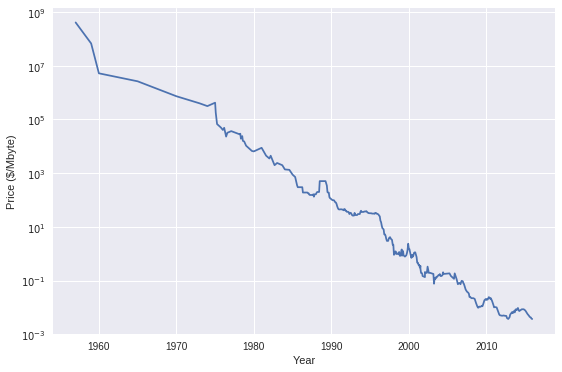

In [3]:
ram_prices = pd.read_csv("ram_price.csv")

plt.figure(figsize=(9,6))
plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price ($/Mbyte)")

In [4]:
ram_prices.head(),ram_prices.tail()

(   Unnamed: 0    date        price
 0           0  1957.0  411041792.0
 1           1  1959.0   67947725.0
 2           2  1960.0    5242880.0
 3           3  1965.0    2642412.0
 4           4  1970.0     734003.0,      Unnamed: 0     date   price
 328         328  2015.58  0.0045
 329         329  2015.67  0.0043
 330         330  2015.75  0.0042
 331         331  2015.83  0.0038
 332         332  2015.92  0.0037)

* y축(가격)은 로그 스케일로 로그 스케일로 그리면 약간의 굴곡을 제외하고는 선형적으로 나타나서 예측이 쉬워진다.
* 2000년 전까지의 데이터로 2000년 후의 데이터를 예측해보자. 
* 선형회귀(LinearRegression)를 수행한다. 
* 모델을 훈련시키고 예측을 수행한 후 로그 스케일로 되돌리기 위해 지수 함수를 사용한다.

In [0]:
# 머심러닝 방법 선택과 훈련/테스트 데이터 구성
# LinearRegression
from sklearn.linear_model import LinearRegression
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [6]:
data_train.shape,data_test.shape

((202, 3), (131, 3))

In [0]:
# 데이터 전처리
# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis] # 열벡터로 변환
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

In [8]:
X_train.shape,y_train.shape

((202, 1), (202,))

In [0]:
# 선형 회기 모델 만들기
linear_reg = LinearRegression().fit(X_train, y_train)

### 도전하기 

> RAM 가격 변동에 대한 선형 회기 모델의 정확도를 구하시오.

In [10]:
# RAM 가격 변동에 대한 선형 회기 모델의 정확도
X_test = data_test.date[:, np.newaxis]  # test input
y_test = np.log(data_test.price)  # test output, 로그 스케일

print("테스트 세트의 정확도: {:.2f}".format(linear_reg.score(X_test, y_test)))

테스트 세트의 정확도: 0.83


* 선형 모델은 직선으로 데이터를 근사하여 결과를 예측한다 
* 모델이 가진 데이터 범위 밖에서도 외삽(extreapolation)을 이용해서 예측한다. 

### 3. 수능 점수 예측 (다변수 선형회기, Multivariate Linear regression)

> [data-01-test-score.csv](https://github.com/Redwoods/Py/blob/master/py-basic/tips/data-01-test-score.csv)

수험생 25명의 수능 세 개 영역의 점수를 이용해서 수능 점수를 예측하는 다변수 선형회기 모델을 만든다.

In [11]:
# data
data = np.loadtxt('./data-01-test-score.csv', delimiter=',', dtype=np.float32)
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]], dtype=float32)

In [12]:
data.shape

(25, 4)

#### [1] 25명 전체 데이터를 훈련 데이터로 지정한다.

In [0]:
# LinearRegression
from sklearn.linear_model import LinearRegression

# 25명 전체 데이터를 훈련 데이터로 지정한다.
data_X = data[:, 0:-1]
data_y = data[:,[-1]]

In [14]:
data_X.shape, data_y.shape

((25, 3), (25, 1))

In [15]:
data_X,data_y  # 영역별 점수와 수능점수

(array([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.],
        [ 53.,  46.,  55.],
        [ 69.,  74.,  77.],
        [ 47.,  56.,  60.],
        [ 87.,  79.,  90.],
        [ 79.,  70.,  88.],
        [ 69.,  70.,  73.],
        [ 70.,  65.,  74.],
        [ 93.,  95.,  91.],
        [ 79.,  80.,  73.],
        [ 70.,  73.,  78.],
        [ 93.,  89.,  96.],
        [ 78.,  75.,  68.],
        [ 81.,  90.,  93.],
        [ 88.,  92.,  86.],
        [ 78.,  83.,  77.],
        [ 82.,  86.,  90.],
        [ 86.,  82.,  89.],
        [ 78.,  83.,  85.],
        [ 76.,  83.,  71.],
        [ 96.,  93.,  95.]], dtype=float32), array([[152.],
        [185.],
        [180.],
        [196.],
        [142.],
        [101.],
        [149.],
        [115.],
        [175.],
        [164.],
        [141.],
        [141.],
        [184.],
        [152.],
        [148.],
        [192.],
        [147.],
        [183

In [0]:
# 수능 점수 예측을 위한 트레인 데이터 만들기
X_train = data_X
y_train = data_y
# 선형 회기 모델 만들기
lr_model = LinearRegression().fit(X_train, y_train)

In [17]:
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# model : coef_, intercept_
lr_model.coef_,lr_model.intercept_

(array([[0.35593864, 0.54251873, 1.1674442 ]], dtype=float32),
 array([-4.336151], dtype=float32))

In [19]:
lr_model.coef_.shape,lr_model.intercept_.shape

((1, 3), (1,))

In [20]:
# 새로운 3개 영역 점수로 수능 점수 예측 비교
test = np.array([100, 98, 81])
test.shape

(3,)

In [21]:
lr_model.predict(test.reshape(1,-1))

array([[178.98753178]])

In [22]:
# 수능 점수에 대한 선형 회기 모델의 정확도
print("트레인 세트의 정확도: {:.2f}".format(lr_model.score(X_train, y_train)))

트레인 세트의 정확도: 0.99


> overfitting!!  --- 과대접합

***

## [wk11] Homework

> 25명 중 20명의 데이터를 훈련 데이터, 나머지 5명을 데스트 데이터로 지정한다.

> 모델의 정확도를 계산한다.

##### ================== 마감: 2018.11.18(일). 24:00

> [1] 데이터 구성

In [0]:
# 데이터 구성
# LinearRegression
# from sklearn.linear_model import LinearRegression
# 25명 중 20명의 데이터를 훈련 데이터, 나머지 5명을 데스트 데이터로 지정한다.
X_train = data[0:-5, 0:-1]
y_train = data[0:-5,[-1]]
X_test = data[-5:, 0:-1]
y_test = data[-5:,[-1]]

In [0]:
# x_train = data[:20, 0:3]   # 트레이닝 데이터로 20개 저장(과목3개)
# x_test = data[20:,0:3]     # 테스트 데이터로 5개 저장(과목3개)

# y_train = data[:20,[-1]]   # 트레이닝 데이터로 20개 저장(수능점수)
# y_test = data[20:,[-1]]    # 테스트 데이터로 5개 저장(수능점수)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((20, 3), (20, 1), (5, 3), (5, 1))

> [2] 선형 회기 모델

In [25]:
# 20명의 트레인 데이터 이용
# 선형 회기 모델 만들기
lr_model_20 = LinearRegression().fit(X_train, y_train)

lr_model_20


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# 선형회기 결과 -> 3개 특성(영역별 점수) 계수 및 y-절편(bias)
lr_model_20.coef_,lr_model_20.intercept_

(array([[0.4355938, 0.5249363, 1.0842971]], dtype=float32),
 array([-2.8510742], dtype=float32))

> [3] 예측과 정확도 평가

In [27]:
# 테스트 데이터에 대한 예측과 정확도 평가
# 가상적인 3개 영역 점수로 수능 점수 예측
test = np.array([100, 98, 81]) # 가상 점수 입력

lr_model_20.predict(test)  # Error, why?


ValueError: ignored

In [28]:
lr_model_20.predict(test.reshape(1,-1))

array([[179.98012829]])

#### lr_model vs. lr_model_20

> 전체 데이터를 이용한 모델과 80%의 트레인 데이터를 이용한 모델의 비교

In [29]:
# lr_model과 lr_model_20의 예측 비교
lr_model.predict(test.reshape(1,-1)),lr_model_20.predict(test.reshape(1,-1))

(array([[178.98753178]]), array([[179.98012829]]))

#### 테스트 데이터에 대한 예측 성능 평가

In [30]:
lr_model_20.predict(X_test), y_test

(array([[175.59888],
        [174.15721],
        [166.86021],
        [150.80887],
        [190.79323]], dtype=float32), array([[177.],
        [175.],
        [175.],
        [149.],
        [192.]], dtype=float32))

In [31]:
# 수능 점수에 대한 선형 회기 모델의 정확도

print("트레인 세트의 정확도: {:.2f}".format(lr_model_20.score(X_train, y_train)))
print("테스트 세트의 정확도: {:.2f}".format(lr_model_20.score(X_test, y_test)))


트레인 세트의 정확도: 0.99
테스트 세트의 정확도: 0.92


***

## pandas의 데이터프레임을 이용한 수능 성적 회기 분석

### 수능 데이터로 데이터프레임 구성 - pandas

In [32]:
# Make dataframe
import pandas as pd

df = pd.DataFrame(data, columns=['S1','S2','S3','Final'])
df

,S1,S2,S3,Final
0,73.0,80.0,75.0,152.0
1,93.0,88.0,93.0,185.0
2,89.0,91.0,90.0,180.0
3,96.0,98.0,100.0,196.0
4,73.0,66.0,70.0,142.0
5,53.0,46.0,55.0,101.0
6,69.0,74.0,77.0,149.0
7,47.0,56.0,60.0,115.0
8,87.0,79.0,90.0,175.0
9,79.0,70.0,88.0,164.0


In [33]:
# 데이터프레임 길이 정보
df.shape,len(df),df.size

((25, 4), 25, 100)

In [0]:
### 데이터프레임을 이용한 그래프 그리기

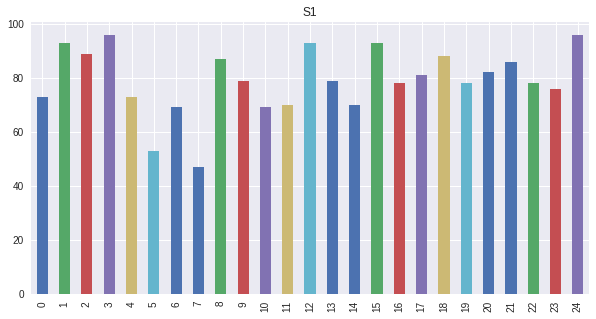

In [34]:
# Bar graph of S1
df['S1'].plot.bar(figsize=(10,5), title="S1")

In [35]:
df.columns

Index(['S1', 'S2', 'S3', 'Final'], dtype='object')

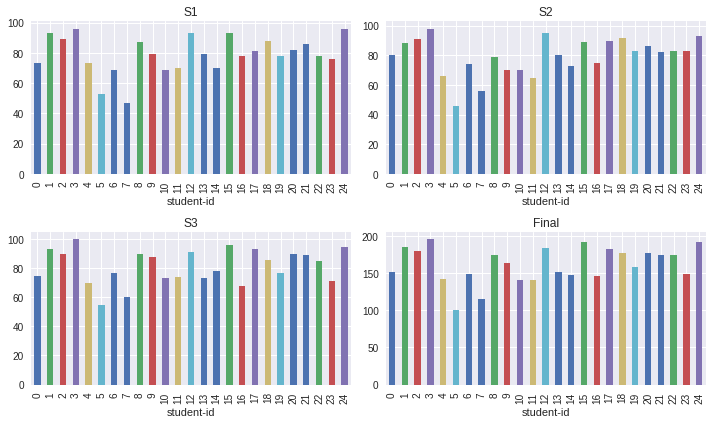

In [36]:
# Multiple plots
series_labels = df.columns # ['S1', 'S2', 'S3', 'Final']

# 2x2의 그래프를 그리는 준비
fig, axs = plt.subplots(2, 2, figsize=(10, 6)) #, sharex=True, sharey=False)

# 세 개 영역 점수와 수능 점수 그래프
for axi, idx in zip(axs.ravel(), list(range(4))):
    
    # 예측결과 그래프와 테스트 데이터 점을 그림
    df[series_labels[idx]].plot.bar(ax=axi)
    axi.set(ylabel='', xlabel='student-id',
           title=series_labels[idx])

plt.tight_layout()

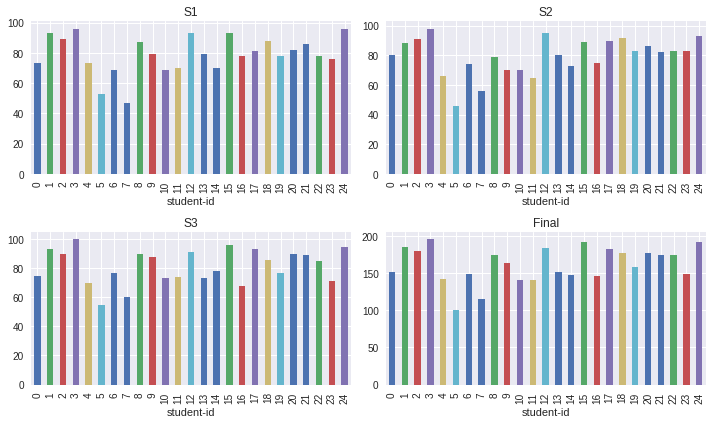

In [42]:
# sharex, sharey 설정
fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharex=False, sharey=False)  # True or False

# 세 개 영역 점수와 수능 점수 그래프
for axi, idx in zip(axs.ravel(), list(range(4))):
    
    # 예측결과 그래프와 테스트 데이터 점을 그림
    df[series_labels[idx]].plot.bar(ax=axi)
    axi.set(ylabel='', xlabel='student-id',
           title=series_labels[idx])

plt.tight_layout()

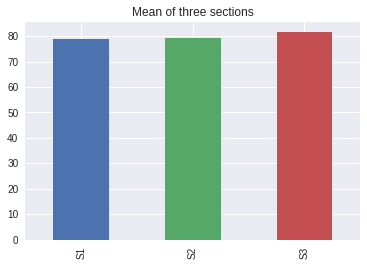

In [43]:
# 영역평균 그래프
df[['S1', 'S2', 'S3']].mean().plot.bar(title='Mean of three sections')

#### 다변수 선형회기 분석

In [44]:
# 입력 데이터 배열과 출력 벡터 분리
df[['S1','S2','S3']],df['Final']

(      S1    S2     S3
 0   73.0  80.0   75.0
 1   93.0  88.0   93.0
 2   89.0  91.0   90.0
 3   96.0  98.0  100.0
 4   73.0  66.0   70.0
 5   53.0  46.0   55.0
 6   69.0  74.0   77.0
 7   47.0  56.0   60.0
 8   87.0  79.0   90.0
 9   79.0  70.0   88.0
 10  69.0  70.0   73.0
 11  70.0  65.0   74.0
 12  93.0  95.0   91.0
 13  79.0  80.0   73.0
 14  70.0  73.0   78.0
 15  93.0  89.0   96.0
 16  78.0  75.0   68.0
 17  81.0  90.0   93.0
 18  88.0  92.0   86.0
 19  78.0  83.0   77.0
 20  82.0  86.0   90.0
 21  86.0  82.0   89.0
 22  78.0  83.0   85.0
 23  76.0  83.0   71.0
 24  96.0  93.0   95.0, 0     152.0
 1     185.0
 2     180.0
 3     196.0
 4     142.0
 5     101.0
 6     149.0
 7     115.0
 8     175.0
 9     164.0
 10    141.0
 11    141.0
 12    184.0
 13    152.0
 14    148.0
 15    192.0
 16    147.0
 17    183.0
 18    177.0
 19    159.0
 20    177.0
 21    175.0
 22    175.0
 23    149.0
 24    192.0
 Name: Final, dtype: float32)

In [0]:
# 트레인/테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['S1','S2','S3']], df['Final'], 
                                                    test_size=0.2, random_state=0)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 3), (5, 3), (20,), (5,))

In [47]:
# 선형회기 모델
# LinearRegression
from sklearn.linear_model import LinearRegression

# 선형 회기 모델 만들기: 테스트 데이터 이용
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
# 선형회기 모델 확인
# 선형회기 결과 -> 3개 특성(영역별 점수) 계수 및 y-절편(bias)

model.coef_,model.intercept_


(array([0.32701108, 0.47623563, 1.2409751 ], dtype=float32), -2.69104)

In [49]:
model.predict(X_test),y_test

(array([104.80102, 181.43814, 157.89847, 142.9198 , 142.98721],
       dtype=float32), 5     101.0
 2     180.0
 19    159.0
 16    147.0
 11    141.0
 Name: Final, dtype: float32)

In [50]:
# 수능 점수에 대한 선형 회기 모델의 정확도

print("트레인 세트의 정확도: {:.2f}".format(model.score(X_train, y_train)))
print("테스트 세트의 정확도: {:.2f}".format(model.score(X_test, y_test)))


트레인 세트의 정확도: 0.99
테스트 세트의 정확도: 0.99


***

### 분류와 회기 모델의 정확도는 어떻게 평가?

1. 분류: 
    > 테스트 데이터의 원래 label(y)과 예측 label($\hat y$)과의 비교
    
2. 회기:
    > $R^{2}$
    
    > $R^{2} = 1 - \frac {\sum_{i}(y_{i} - \hat y_{i})^2} {\sum_{i}(y_{i} - \bar y)^2}$

## [wk13] Study again!

> 다음 Youtube 강의 3편를 들으면서 linear regression을 공부하시오.

> 특히, 세번째 동영상 linear regression III를 이번 연습과 연관해서 공부하시오.


In [0]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('uk7UfDgVKrU')  # linear regression I

In [0]:
YouTubeVideo('q0pQ_AdphDo')  # linear regression II

In [0]:
YouTubeVideo('Aw-E-jw3WaE')  # linear regression III

***